In [1]:
# Install necessary libraries (if not installed)
!pip install pandas numpy scikit-learn

# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
file_path = "/content/corrected_ev_charging_data.csv"  # Update with correct path if needed
df = pd.read_csv(file_path)

# Convert Timestamp to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Select relevant features for prediction
features = ['Queue_Time_mins', 'Latitude', 'Longitude']
target = 'Charging_Demand_kW'

# Handle missing values (if any)
df = df.dropna(subset=features + [target])

# Split data into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regression Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict Charging Load
y_pred = model.predict(X_test)

# Evaluate Model Performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Model Evaluation:\nMAE: {mae:.2f} | RMSE: {rmse:.2f} | R² Score: {r2:.2f}")

# Save predictions to CSV for Tableau visualization
predictions_df = X_test.copy()
predictions_df['Actual_Charging_Load_kW'] = y_test
predictions_df['Predicted_Charging_Load_kW'] = y_pred

predictions_file = "charging_demand_predictions.csv"
predictions_df.to_csv(predictions_file, index=False)

# Auto-download the file in Google Colab
from google.colab import files
files.download(predictions_file)

print(f"✅ Predictions saved and downloaded: {predictions_file}")


Model Evaluation:
MAE: 12.63 | RMSE: 14.95 | R² Score: -0.37


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Predictions saved and downloaded: charging_demand_predictions.csv


📌 Dataset Preview:
   Queue_Time_mins  Latitude  Longitude  Actual_Charging_Load_kW  \
0               11  6.833333   3.333333                34.859391   
1               26  6.833333   3.333333                36.484825   
2               11  7.500000   4.000000                26.086543   
3                4  7.166667   3.666667                25.782322   
4               12  6.944444   3.444444                 9.243760   

   Predicted_Charging_Load_kW  
0                   36.208018  
1                   32.384380  
2                   28.522607  
3                   19.578187  
4                   29.320017  


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128268 (\N{ELECTRIC PLUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


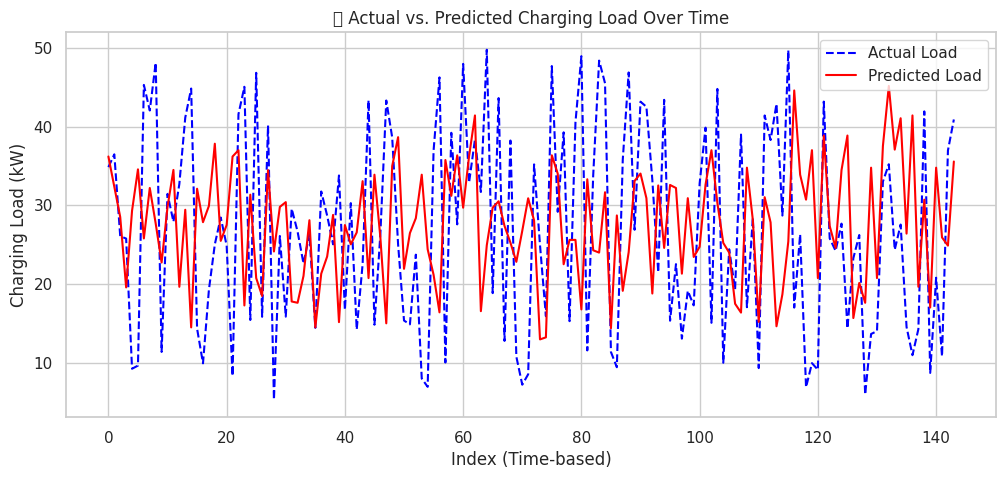

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


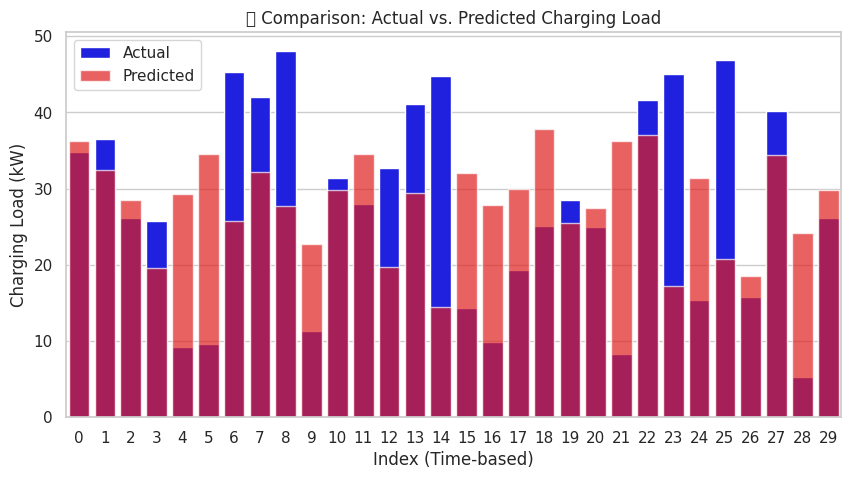

🌍 Interactive Map of Charging Stations with Predicted Demand

📊 Summary Statistics:
       Actual_Charging_Load_kW  Predicted_Charging_Load_kW
count               144.000000                  144.000000
mean                 26.808966                   27.468566
std                  12.812219                    7.314823
min                   5.304332                   12.972451
25%                  15.030076                   21.786440
50%                  26.276542                   27.767382
75%                  38.439991                   33.083691
max                  49.772081                   45.177759


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


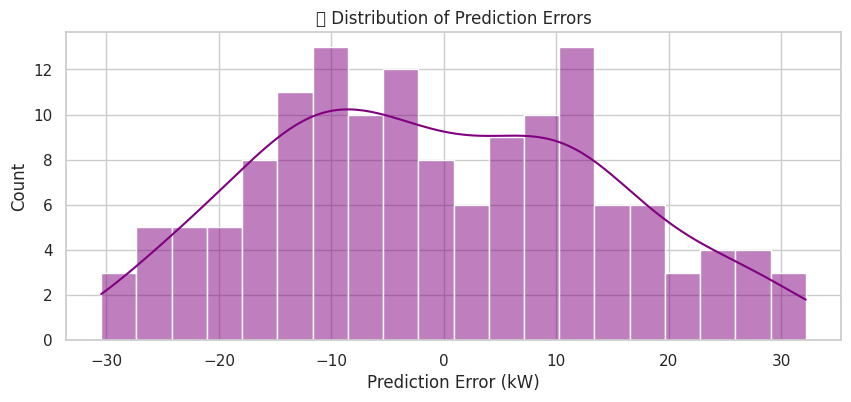

In [2]:
# Install necessary libraries (if not installed)
!pip install pandas numpy matplotlib seaborn folium

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# Load predictions dataset
file_path = "/content/charging_demand_predictions.csv"  # Update if needed
df = pd.read_csv(file_path)

# Display first few rows
print("📌 Dataset Preview:")
print(df.head())

# Set Seaborn style
sns.set_theme(style="whitegrid")

# 📈 Line Chart: Actual vs. Predicted Charging Load Over Time
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['Actual_Charging_Load_kW'], label="Actual Load", color='blue', linestyle='dashed')
plt.plot(df.index, df['Predicted_Charging_Load_kW'], label="Predicted Load", color='red')
plt.xlabel("Index (Time-based)")
plt.ylabel("Charging Load (kW)")
plt.title("🔌 Actual vs. Predicted Charging Load Over Time")
plt.legend()
plt.show()

# 📊 Bar Chart: Prediction Accuracy (Actual vs. Predicted)
plt.figure(figsize=(10, 5))
sns.barplot(x=df.index[:30], y=df['Actual_Charging_Load_kW'][:30], color='blue', label="Actual")
sns.barplot(x=df.index[:30], y=df['Predicted_Charging_Load_kW'][:30], color='red', alpha=0.7, label="Predicted")
plt.xlabel("Index (Time-based)")
plt.ylabel("Charging Load (kW)")
plt.title("🔍 Comparison: Actual vs. Predicted Charging Load")
plt.legend()
plt.show()

# 🌍 Map Visualization: Charging Station Locations with Demand
if 'Latitude' in df.columns and 'Longitude' in df.columns:
    station_map = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=10)

    for _, row in df.iterrows():
        folium.CircleMarker(
            location=[row['Latitude'], row['Longitude']],
            radius=row['Predicted_Charging_Load_kW'] / 10,  # Scale size by load
            color="red" if row['Predicted_Charging_Load_kW'] > row['Actual_Charging_Load_kW'] else "green",
            fill=True,
            fill_opacity=0.6,
            popup=f"Predicted Load: {row['Predicted_Charging_Load_kW']:.2f} kW\nActual Load: {row['Actual_Charging_Load_kW']:.2f} kW"
        ).add_to(station_map)

    print("🌍 Interactive Map of Charging Stations with Predicted Demand")
    station_map
else:
    print("⚠️ Latitude & Longitude columns not found. Map visualization skipped.")

# 📌 Display Summary Statistics
print("\n📊 Summary Statistics:")
print(df[['Actual_Charging_Load_kW', 'Predicted_Charging_Load_kW']].describe())

# 📉 Error Distribution: Histogram of Prediction Errors
df['Error'] = df['Actual_Charging_Load_kW'] - df['Predicted_Charging_Load_kW']
plt.figure(figsize=(10, 4))
sns.histplot(df['Error'], bins=20, kde=True, color="purple")
plt.xlabel("Prediction Error (kW)")
plt.title("📉 Distribution of Prediction Errors")
plt.show()
